In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [22]:
from torch.utils.data import TensorDataset, random_split, DataLoader
import torch.nn as nn
import torch.optim as optim

Creating the XOR dataset 

In [98]:
torch.manual_seed(42)
num_samples = 400

X = np.random.randn(num_samples, 2) * 3
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1) 

dataset = TensorDataset(X, y)

# 200 for train and 200 for test.
train_size = num_samples // 2
test_size = num_samples - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

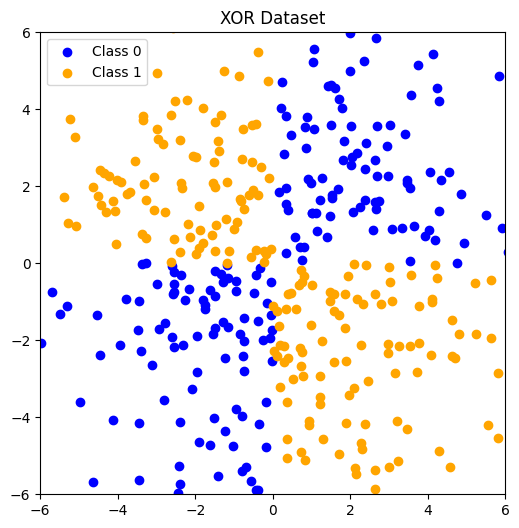

In [99]:
# Plotting the XOR dataset

X_np = X.numpy()
y_np = y.numpy().flatten()
# converting it to numpy 

plt.figure(figsize=(6, 6))
plt.scatter(X_np[y_np == 0][:, 0], X_np[y_np == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_np[y_np == 1][:, 0], X_np[y_np == 1][:, 1], color='orange', label='Class 1')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.legend()
plt.title("XOR Dataset")
plt.show()

In [100]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)

In [101]:
train_loader

In [102]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.fc1 = nn.Linear(2,4)
        self.fc2 = nn.Linear(4,1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        
        return x

In [103]:
model = MLP()

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [104]:
def train_model(model, train_loader, epochs):
    for epoch in range(epochs):
        for input, target in train_loader:
            output = model(input)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f"Epcoh [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")        

In [112]:
def accuracy_model(model, test_loader):
    model.eval()
    
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs,targets in test_loader:
            outputs = model(inputs)
            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            
        accuracy = 100 * correct / total
        print(f"Accuracy of the model in the Test Dataset is {accuracy:.2f}")

In [107]:
def plot_decision_surface(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

    with torch.no_grad():
        model.eval()
        zz = model(grid).numpy()

    zz = zz.reshape(xx.shape)

    plt.contourf(xx, yy, zz, levels=50, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Decision Surface of the MLP Model')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()


In [113]:
# Training the model
train_model(model, train_loader, 500) 

Epcoh [10/500], Loss: 0.0048
Epcoh [20/500], Loss: 0.4410
Epcoh [30/500], Loss: 0.0000
Epcoh [40/500], Loss: 0.0000
Epcoh [50/500], Loss: 0.0296
Epcoh [60/500], Loss: 1.1706
Epcoh [70/500], Loss: 0.0000
Epcoh [80/500], Loss: 0.6150
Epcoh [90/500], Loss: 0.0000
Epcoh [100/500], Loss: 0.0000
Epcoh [110/500], Loss: 0.0000
Epcoh [120/500], Loss: 0.0000
Epcoh [130/500], Loss: 0.0550
Epcoh [140/500], Loss: 0.0000
Epcoh [150/500], Loss: 0.0000
Epcoh [160/500], Loss: 0.0000
Epcoh [170/500], Loss: 0.0008
Epcoh [180/500], Loss: 0.0000
Epcoh [190/500], Loss: 0.0000
Epcoh [200/500], Loss: 0.4819
Epcoh [210/500], Loss: 0.0601
Epcoh [220/500], Loss: 0.0000
Epcoh [230/500], Loss: 0.0000
Epcoh [240/500], Loss: 0.0000
Epcoh [250/500], Loss: 0.0000
Epcoh [260/500], Loss: 0.0000
Epcoh [270/500], Loss: 0.0000
Epcoh [280/500], Loss: 0.0000
Epcoh [290/500], Loss: 2.5775
Epcoh [300/500], Loss: 0.0000
Epcoh [310/500], Loss: 12.5000
Epcoh [320/500], Loss: 0.0000
Epcoh [330/500], Loss: 0.0000
Epcoh [340/500], L

In [116]:
accuracy_model(model, test_loader)

Accuracy of the model in the Test Dataset is 98.50


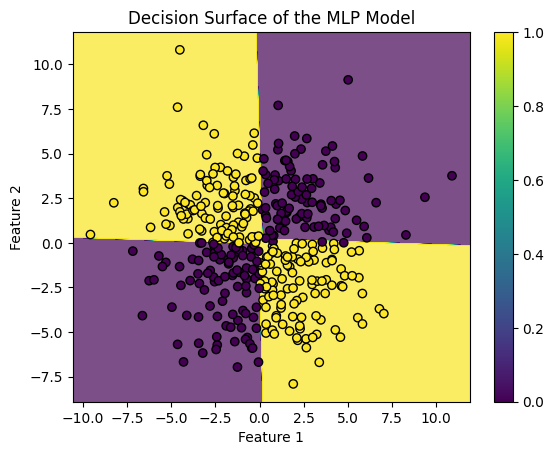

In [115]:
X_np = X.numpy()
y_np = y.numpy()

plot_decision_surface(model, X_np, y_np)


MLP w/ L1 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)

In [117]:
train_size = int(len(train_dataset) * 0.8)  # 80% for training
val_size = len(train_dataset) - train_size  # 20% for validation
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

In [118]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [119]:
class MLP_L1(MLP):
    def __init__(self, lambda_l1):
        super(MLP_L1, self).__init__()
        self.lambda_l1 = lambda_l1

    def l1_regularization(self):
        l1_loss = 0.0
        for param in self.parameters():
            l1_loss += torch.sum(torch.abs(param))
        return self.lambda_l1 * l1_loss

In [137]:
def train_model(model, train_loader, num_epochs, criterion, optimizer):
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0

        for inputs, targets in train_loader:
            optimizer.zero_grad() 

            outputs = model(inputs)
            loss = criterion(outputs, targets)  

            loss.backward()  
            optimizer.step() 

            running_loss += loss.item()  

    print('Training complete.')


In [138]:
def evaluate_model(model, val_loader):
    model.eval() 
    correct = 0
    total = 0

    with torch.no_grad(): 
        for inputs, targets in val_loader:
            outputs = model(inputs) 
            predicted = (outputs >= 0.5).float()
            
            total += targets.size(0) 
            correct += (predicted.eq(targets).sum().item())

    accuracy = (correct / total) * 100 if total > 0 else 0
    return accuracy


In [142]:
def validate_regularization(model_class, lambda_values, train_loader, val_loader):
    best_lambda = None
    best_model = None
    best_accuracy = 0

    for lambda_val in lambda_values:
        model = model_class(lambda_val)
        optimizer = optim.Adam(model.parameters(), lr=0.01)

        train_model(model, train_loader, num_epochs=500, criterion=nn.BCELoss(), optimizer=optimizer)

        accuracy = evaluate_model(model, val_loader)
        print(f'Lambda: {lambda_val}, Validation Accuracy: {accuracy:.2f}%')

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lambda = lambda_val
            best_model = model

    print(f'Best Lambda: {best_lambda}, Best Validation Accuracy: {best_accuracy:.2f}%')
    return best_lambda, best_model

In [145]:
lambda_values = [0.001, 0.01, 0.1, 1.0, 10.0]
best_lambda_l1, best_model_l1 = validate_regularization(MLP_L1, lambda_values, train_loader, val_loader)

Training complete.
Lambda: 0.001, Validation Accuracy: 72.50%
Training complete.
Lambda: 0.01, Validation Accuracy: 100.00%
Training complete.
Lambda: 0.1, Validation Accuracy: 92.50%
Training complete.
Lambda: 1.0, Validation Accuracy: 97.50%
Training complete.
Lambda: 10.0, Validation Accuracy: 92.50%
Best Lambda: 0.01, Best Validation Accuracy: 100.00%


Accuracy of the best MLP with L1 Regularization: 98.50%


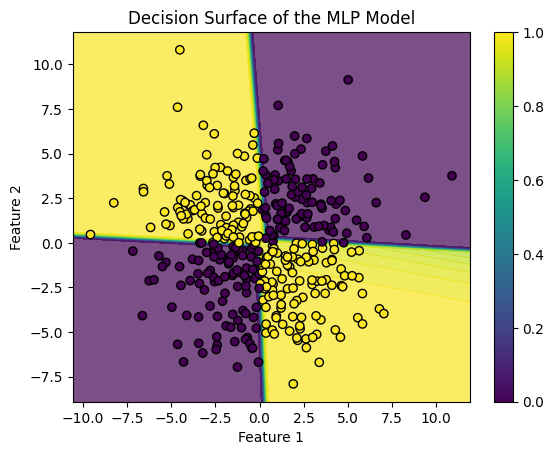

In [146]:
accuracy_best_l1 = evaluate_model(best_model_l1, test_loader)
print(f'Accuracy of the best MLP with L1 Regularization: {accuracy_best_l1:.2f}%')
plot_decision_surface(best_model_l1, X.numpy(), y.numpy())

MLP w/ L2 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)

In [147]:
class MLP_L2(MLP):
    def __init__(self, lambda_l2):
        super(MLP_L2, self).__init__()
        self.lambda_l2 = lambda_l2

    def l2_regularization(self):
        l2_loss = 0.0
        for param in self.parameters():
            l2_loss += torch.sum(param ** 2)
        return self.lambda_l2 * l2_loss

In [149]:
best_lambda_l2, best_model_l2 = validate_regularization(MLP_L2, lambda_values, train_loader, val_loader)

Training complete.
Lambda: 0.001, Validation Accuracy: 97.50%
Training complete.
Lambda: 0.01, Validation Accuracy: 97.50%
Training complete.
Lambda: 0.1, Validation Accuracy: 100.00%
Training complete.
Lambda: 1.0, Validation Accuracy: 95.00%
Training complete.
Lambda: 10.0, Validation Accuracy: 92.50%
Best Lambda: 0.1, Best Validation Accuracy: 100.00%


Accuracy of the best MLP with L2 Regularization: 98.50%


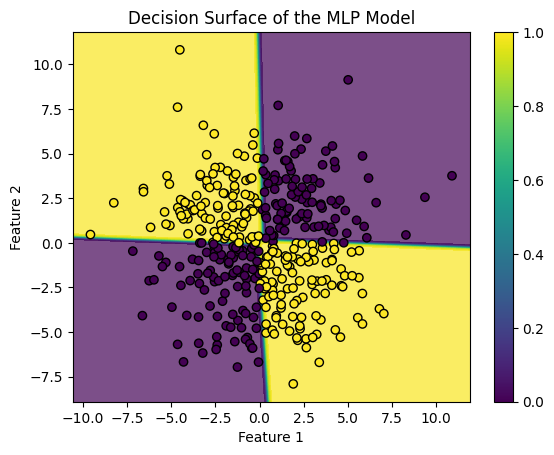

In [150]:
accuracy_best_l2 = evaluate_model(best_model_l2, test_loader)
print(f'Accuracy of the best MLP with L2 Regularization: {accuracy_best_l2:.2f}%')
plot_decision_surface(best_model_l2, X.numpy(), y.numpy())


Learn logistic regression models on the same data with additional features (such as x1*x2, x1^2, etc.)

In [151]:
X_extended = torch.cat([X, (X[:, 0] * X[:, 1]).unsqueeze(1), (X[:, 0] ** 2).unsqueeze(1), (X[:, 1] ** 2).unsqueeze(1)], dim=1)

dataset_extended = TensorDataset(X_extended, y)
num_samples = len(dataset_extended) 
train_size = num_samples // 2
test_size = num_samples - train_size
train_dataset_extended, test_dataset_extended = random_split(dataset_extended, [train_size, test_size])

train_loader_extended = DataLoader(train_dataset_extended, batch_size=8, shuffle=True)
test_loader_extended = DataLoader(test_dataset_extended, batch_size=8, shuffle=False)

In [152]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.fc = nn.Linear(5, 1)  # 2 original features + 3 additional features

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

In [153]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_surface(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32)

    x1, x2 = grid_tensor[:, 0], grid_tensor[:, 1]
    x1_x2 = (x1 * x2).unsqueeze(1)
    x1_squared = (x1 ** 2).unsqueeze(1)
    x2_squared = (x2 ** 2).unsqueeze(1)

    grid_extended = torch.cat([grid_tensor, x1_x2, x1_squared, x2_squared], dim=1)

    with torch.no_grad():
        model.eval()
        zz = model(grid_extended).numpy().reshape(xx.shape)

    plt.contourf(xx, yy, zz, levels=50, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()


Training complete.
Accuracy of Logistic Regression with Additional Features: 97.50%


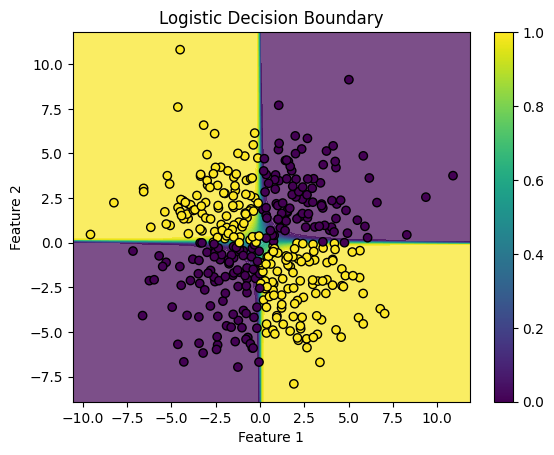

In [155]:
# Logistic Regression Model
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.fc = nn.Linear(5, 1)  # 5 features in total

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

model_logistic = LogisticRegression()
criterion = nn.BCELoss()
optimizer = optim.Adam(model_logistic.parameters(), lr=0.01)

train_model(model_logistic, train_loader_extended, num_epochs=100, criterion=criterion, optimizer=optimizer)

accuracy_logistic = evaluate_model(model_logistic, test_loader_extended)
print(f'Accuracy of Logistic Regression with Additional Features: {accuracy_logistic:.2f}%')

plot_decision_surface(model_logistic, X_extended.numpy(), y.numpy(), "Logistic Decision Boundary")
